# 1

В случае нулевых средних арифметических коэффициент пирсона равен:

\begin{equation*}
R = \frac{cov(x, y)}{\sigma_x \sigma_y} = \frac{\sum_{i = 1}^n (x^i - \overline{x})(y^i - \overline{y})}{\sqrt{\sum_{i = 1}^n (x^i - \overline x) \cdot \sum_{i = 1}^n (y^i - \overline y)}} = \frac{\sum_{i = 1}^n x^i\cdot y^i}{\sqrt{\sum_{i = 1}^n (x^i)^2 \cdot \sum_{i = 1}^n (y^i)^2}}
\end{equation*}

Однако косинус угла между двумя векторами в туже очередь равен:

\begin{equation*}
cos \alpha = \frac{u \cdot v}{|u|\cdot|v|} = \frac{\sum_{i = 1}^n x^i\cdot y^i}{\sqrt{\sum_{i = 1}^n (x^i)^2 \cdot \sum_{i = 1}^n (y^i)^2}}
\end{equation*}

Соответственно в случае нулевых средних арифметических коэффициент пирсона для двух выборок, равен косинусу угла между двумя векторами, представляющих эти выборки в $R^n$ пространстве



# 2

Пусть нам дана матрица $X$, в которой $n$ строк и $d$ столбцов :
$$
X = 
\begin{bmatrix}
x_{11} & x_{12}  & \cdots   & x_{1d}   \\
x_{21} & x_{22}  & \cdots   & x_{2d}  \\
\vdots & \vdots  & \ddots   & \vdots  \\
x_{n1} & x_{n2}  & \cdots  & x_{nd}  \\
\end{bmatrix}
$$

тогда $X^T$, будет иметь $d$ строк и $n$ столбцов:
$$
X^T = 
\begin{bmatrix}
x_{11} & x_{21}  & \cdots   & x_{1n}  \\
x_{12} & x_{22}  & \cdots   & x_{2n}  \\
\vdots & \vdots  & \ddots   & \vdots  \\
x_{d1} & x_{d2}  & \cdots  & x_{dn}  \\
\end{bmatrix}
$$
При произведении $X^TX$ получим матрицу $A$:

$$
X^TX = 
\begin{bmatrix}
\sum_k^d x_{1k}\cdot x_{k1} & \sum_k^d x_{1k}\cdot x_{k2}  & \sum_k^d x_{1k}\cdot x_{kd}   \\
\sum_k^d x_{2k}\cdot x_{k1} & \sum_k^n x_{2k}\cdot x_{k2}  & \sum_k^d x_{2k}\cdot x_{kd}   \\
\vdots & \vdots  & \ddots   & \vdots  \\
\sum_k^d x_{nk}\cdot x_{k1} & \sum_k^n x_{nk}\cdot x_{k2}  & \sum_k^d x_{nk}\cdot x_{kd}   \\
\end{bmatrix}
$$

Заметим, что выборочная ковариационная матрица для матрицы $X$ в точности равна $\frac{1}{n}X^TX$, где n - это размер выборки, ведь $cov(x_{ik}, x_{kj}) = \frac{1}{n}\sum_{k = 1}^n x_{ik} \cdot y_{kj}$

# 3

In [18]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

In [19]:
df = pd.read_csv("BRCA_pam50 (1).tsv", sep="\t", index_col=0)

X = df.iloc[:, :-1].to_numpy()
model = PCA()
model.fit(X)

x = model.components_
xt = np.transpose(x)
A = np.around(np.dot(x, xt), 14)
I = np.identity(len(x)) 
print(f"is X orthogonal?\n{'yes' if np.all(np.equal(A, I)) else 'no'}")

is X orthogonal?
yes


# 4

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv("BRCA_pam50 (1).tsv", sep="\t", index_col=0)

X = df.iloc[:, :-1].to_numpy()
model = PCA()
model.fit(X)

X_pca = model.transform(X)
df.iloc[:, :-1] = X_pca
df.columns = [f"PC{i + 1}" for i in range(X.shape[1])] + ["Subtype"]

np.array([i/sum(df.var()) for i in df.var()])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


array([0.3327276 , 0.28947609, 0.08645656, 0.0496138 , 0.02774454,
       0.02122277, 0.02062738, 0.01588512, 0.01253637, 0.01144837,
       0.01057699, 0.00986824, 0.0083866 , 0.00773094, 0.00753618,
       0.00691335, 0.00598777, 0.0057137 , 0.00512518, 0.00491742,
       0.00482623, 0.00422932, 0.0039203 , 0.00350269, 0.00335749,
       0.00322127, 0.00297009, 0.00292261, 0.00272757, 0.00261699,
       0.00238564, 0.00213089, 0.00204414, 0.00191871, 0.00175182,
       0.00159501, 0.00153376, 0.00142201, 0.00126514, 0.00124037,
       0.00113123, 0.00109889, 0.00098075, 0.00092451, 0.00086863,
       0.00070433, 0.00060184, 0.00057996, 0.00055518, 0.00047767])

In [17]:
model.explained_variance_ratio_

array([0.3327276 , 0.28947609, 0.08645656, 0.0496138 , 0.02774454,
       0.02122277, 0.02062738, 0.01588512, 0.01253637, 0.01144837,
       0.01057699, 0.00986824, 0.0083866 , 0.00773094, 0.00753618,
       0.00691335, 0.00598777, 0.0057137 , 0.00512518, 0.00491742,
       0.00482623, 0.00422932, 0.0039203 , 0.00350269, 0.00335749,
       0.00322127, 0.00297009, 0.00292261, 0.00272757, 0.00261699,
       0.00238564, 0.00213089, 0.00204414, 0.00191871, 0.00175182,
       0.00159501, 0.00153376, 0.00142201, 0.00126514, 0.00124037,
       0.00113123, 0.00109889, 0.00098075, 0.00092451, 0.00086863,
       0.00070433, 0.00060184, 0.00057996, 0.00055518, 0.00047767])

# 5

In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("BRCA_pam50 (1).tsv", sep="\t", index_col=0)

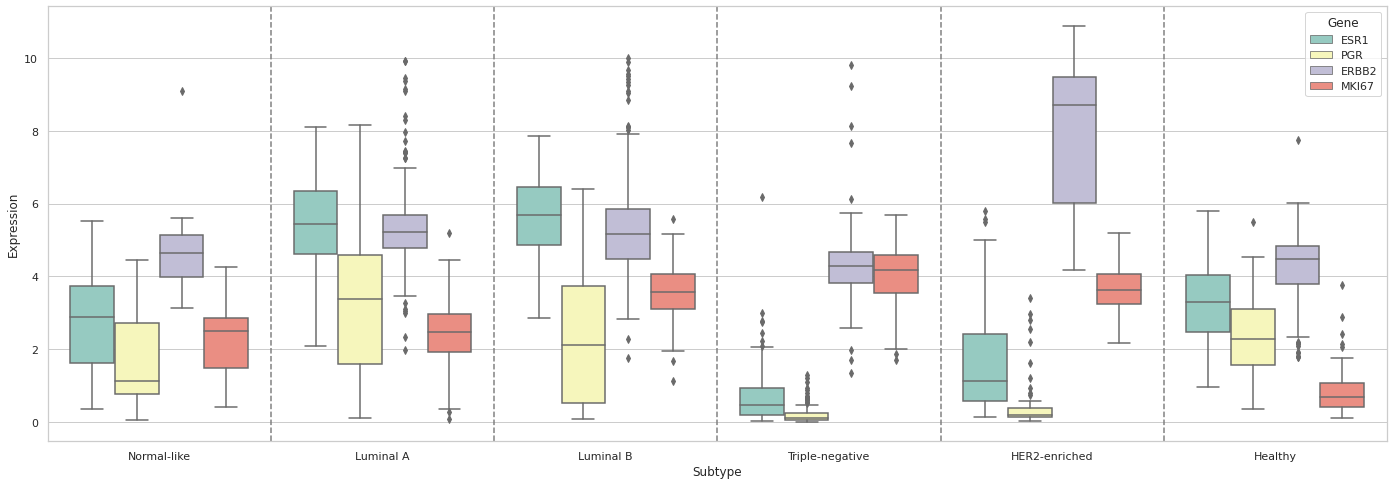

In [5]:
s = ['ESR1', 'PGR', 'ERBB2', 'MKI67']
expr = []
for i in s:
  expr = expr + list(df[i])

gene = []
for i in s:
  for j in range(len(df[i])):
    gene.append(i)

sub = []
for i in s:
  sub = sub + list(df['Subtype'])

A = pd.DataFrame({
    'Expression': expr,
    'Gene': gene,
    'Subtype': sub
})

sns.set_theme(style="whitegrid")
fig = plt.gcf()
fig.set_size_inches(24, 8)
[plt.axvline(x, color = 'gray', linestyle='--') for x in [i + 0.5 for i in range(5)]]
g = sns.boxplot(x = 'Subtype', y = 'Expression', hue = 'Gene', data = A, palette="Set3")